# Analisis Mercado Inmobiliario

La ley de oferta y demanda es un principio económico fundamental que explica cómo cambian los precios cuando cambia la oferta de bienes y servicios o la demanda de los mismos
La relación entre la oferta y la demanda es indirecta, lo que significa que cuando:
**la oferta aumenta, los precios disminuyen y la demanda aumenta**

Por el contrario, **cuando la oferta disminuye, los precios aumentan y la demanda disminuye**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Bajamos los datos de Redfin https://www.redfin.com/news/data-center/

Bajo el titulo Redfin Monthly Housing Market Data, podemos bajar un .csv o .xlsx desde download --> crosstab

In [38]:
import pandas as pd

df = pd.read_excel('data.xlsx')

df.head()

,Region,Week of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,National,"January 29, 2012",159098.0,-0.065036,-0.044589,273143,-0.233680,0.082202,481453,0.504222,-0.033462,2076237,0.003328,-0.175919,96,2,-7,0.956230,-0.001199,0.001817
1,NaN,"February 26, 2012",160504.0,0.008834,-0.013382,301346,0.103253,0.135783,516322,0.072424,0.048186,2098630,0.010785,-0.170155,97,0,-11,0.958026,0.001796,0.002936
2,NaN,"March 25, 2012",171239.0,0.066887,0.042374,389496,0.292518,0.066204,624593,0.209697,-0.055154,2139120,0.019293,-0.171389,93,-4,-12,0.961828,0.003802,0.005955
3,NaN,"April 29, 2012",178099.0,0.040059,0.061778,400243,0.027592,0.081135,609368,-0.024377,-0.027422,2175284,0.016906,-0.172402,81,-12,-16,0.965191,0.003363,0.007000
4,NaN,"May 27, 2012",186067.0,0.044737,0.079059,458963,0.146711,0.163053,611494,0.003489,-0.004274,2184134,0.004068,-0.177071,72,-8,-17,0.968599,0.003408,0.009667


## Crear columna 'date' para normalizar la columna 'Week of Period End'

In [39]:
# Convertir columna 'Week of Period End' a formato datetime
df['date'] = pd.to_datetime(df['Week of Period End'])

# Normalize the date to the beginning of the week
df['date'] = df['date'] - pd.to_timedelta(df['date'].dt.dayofweek, unit='d')

df.head()

,Region,Week of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,date
0,National,"January 29, 2012",159098.0,-0.065036,-0.044589,273143,-0.233680,0.082202,481453,0.504222,-0.033462,2076237,0.003328,-0.175919,96,2,-7,0.956230,-0.001199,0.001817,2012-01-23
1,NaN,"February 26, 2012",160504.0,0.008834,-0.013382,301346,0.103253,0.135783,516322,0.072424,0.048186,2098630,0.010785,-0.170155,97,0,-11,0.958026,0.001796,0.002936,2012-02-20
2,NaN,"March 25, 2012",171239.0,0.066887,0.042374,389496,0.292518,0.066204,624593,0.209697,-0.055154,2139120,0.019293,-0.171389,93,-4,-12,0.961828,0.003802,0.005955,2012-03-19
3,NaN,"April 29, 2012",178099.0,0.040059,0.061778,400243,0.027592,0.081135,609368,-0.024377,-0.027422,2175284,0.016906,-0.172402,81,-12,-16,0.965191,0.003363,0.007000,2012-04-23
4,NaN,"May 27, 2012",186067.0,0.044737,0.079059,458963,0.146711,0.163053,611494,0.003489,-0.004274,2184134,0.004068,-0.177071,72,-8,-17,0.968599,0.003408,0.009667,2012-05-21


## Tendecias por mes

En el siguiente grafico se puede visualizar un incremento en las ofertas de viviendas con un pico en el mes de Mayo
El mes con menor cantidad de nuevos listados 'new listings' es Diciembre.

**Buscar correlaciones entre el aumento de nuevas ofertas en mayo y los precios para comprobar si hay menores precios en ese periodo y por lo tanto comprobar si es conveniente invertir.** 



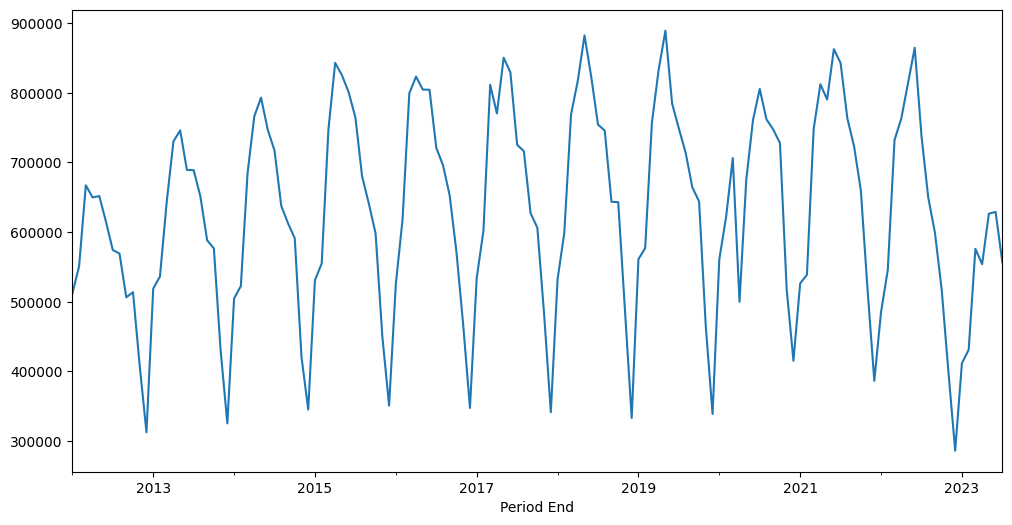

In [41]:
plt.figure(figsize=(12, 6))

df['Period End'] = pd.to_datetime(df['Week of Period End'])
df.set_index('Period End', inplace=True)

monthly_new_listings = df['New Listings'].resample('M').sum()
monthly_new_listings.plot()
plt.show()

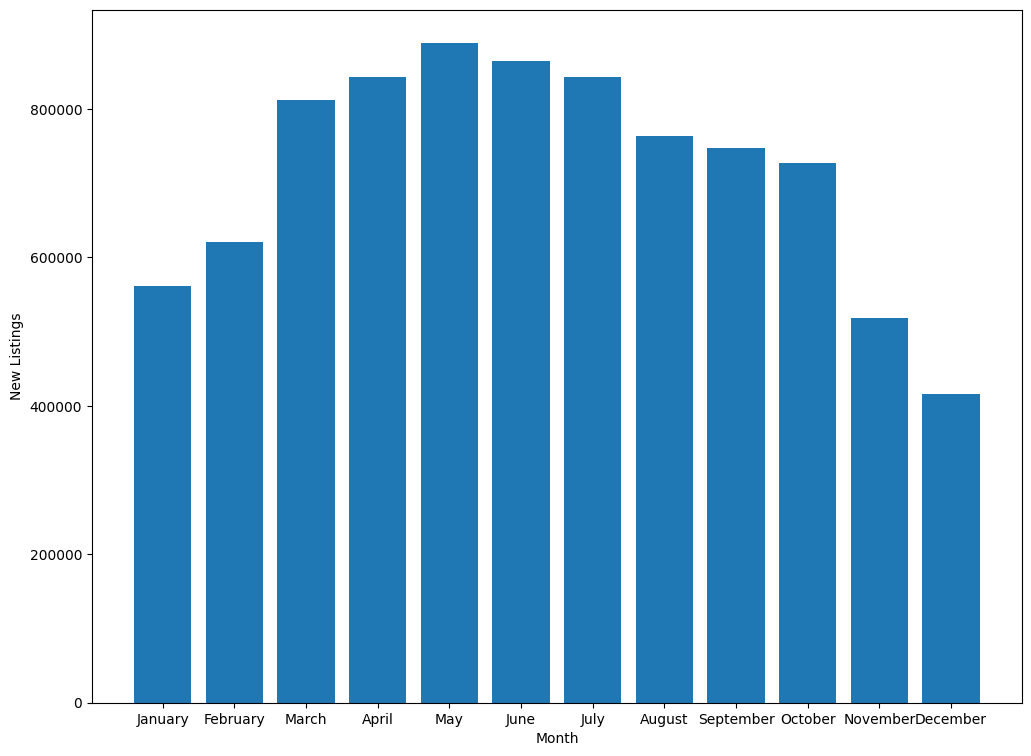

In [42]:
df['Period End'] = pd.to_datetime(df['Week of Period End'])
df.set_index('Period End', inplace=True)
monthly_new_listings = df['New Listings'].resample('M').sum()

plt.figure(figsize=(12, 9))
plt.bar(monthly_new_listings.index.strftime('%B'), monthly_new_listings)
plt.xlabel('Mes')
plt.ylabel('New Listings / Nuevos Listados')
plt.show()
